<a href="https://colab.research.google.com/github/ToshiroHJJZ/Machine_Learning_in_the_Cloud/blob/main/ML4_JP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
Jonathan Penaloza


## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [14]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/MLA4_JP/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Statistical and Visual Exploration

### Splitting Data into Train/Test

In [ ]:
x = df.drop(['forgery'], axis=1)
y = df.forgery

In [ ]:
# prompt: Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [ ]:
numerical_features = x.select_dtypes(include=['number']).columns
categorical_features = x.select_dtypes(include=['object', 'category']).columns

# Create a column transformer to scale the numerical features
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
    ], remainder='passthrough')

In [ ]:
# prompt: Create a pipeline that will transform the data and then run the DecisionTreeClassification algorithm.
from sklearn.tree import DecisionTreeClassifier # Import the DecisionTreeClassifier

# Import the Pipeline class
from sklearn.pipeline import Pipeline

numerical_features = x.select_dtypes(include=['number']).columns
categorical_features = x.select_dtypes(include=['object', 'category']).columns

# Create a column transformer to scale the numerical features
# Assuming 'ct' is already defined as in the previous code
#ct = ColumnTransformer([
#        ('scaler', MinMaxScaler(), numerical_features),
#    ], remainder='passthrough')

# Create a pipeline with the column transformer and the Decision Tree Classifier
pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', DecisionTreeClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(x_test)

### Executing the Model

In [ ]:
# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(x_test)

### Evaluating Model

Precision: 1.00
Recall: 0.96
F1 Score: 0.98


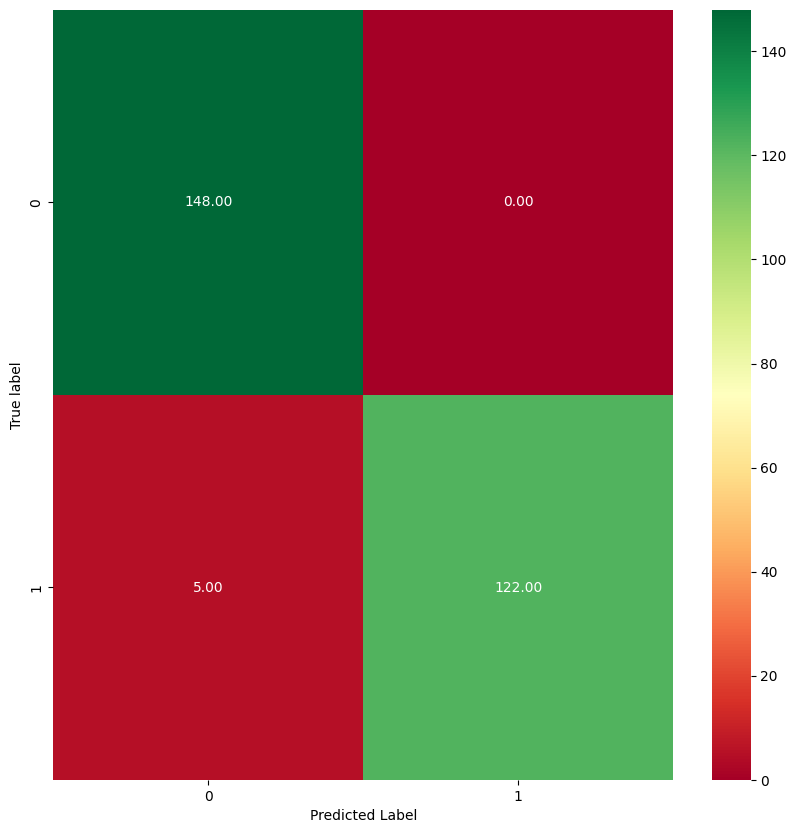

In [ ]:
plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

### Conclusion
A precision score of 0.99 indicates that the model is 99% accurate when identifying forgeries, suggesting a very low likelihood of false positives with this sample. The recall score of 0.94 demonstrates that the model correctly identifies 94% of all actual forgeries, which is strong performance. In the context of detecting bank forgeries, this balance is effective, as false positives are less tolerable than false negatives. Overall, this model is highly suitable for identifying bank forgeries.

## Problem 2

### Reading the Data

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/MLA4_JP/Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [9]:
df.columns = ['date','usage_kwh','lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm','week_status','day_of_week','load_type']

In [10]:
df.columns

Index(['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type'],
      dtype='object')

### Splitting Data into Train/Test

In [11]:
x = df.drop(['date', 'usage_kwh'], axis=1)
y = df['usage_kwh']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [13]:
numerical_features = x.select_dtypes(include=['number']).columns
categorical_features = x.select_dtypes(include=['object', 'category']).columns

In [15]:
# build the pipeline

ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')

pipeline = Pipeline([
    ('transformer', ct),
    ('regressor', DecisionTreeRegressor())
])

In [16]:
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, pipeline.predict(x_train))
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Squared Error for training data: {mse_train:.2f}")

R-squared: 1.00
Mean Squared Error: 1.88
Mean Squared Error for training data: 0.00


### Executing the Model

In [17]:
pipeline.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(x_test)

# Evaluate the model (example using R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# more evaluations
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, pipeline.predict(x_train))

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Squared Error for training data: {mse_train:.2f}")


R-squared: 1.00
Mean Squared Error: 2.12
Mean Squared Error for training data: 0.00


### Evaluating Model

In [ ]:
# Predictions
y_train_pred = pipeline.predict(x_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"RMSE for training data: {rmse_train:.2f}")

rmse_test = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE for testing data: {rmse_test:.2f}")

RMSE for training data: 0.00
RMSE for testing data: 1.41


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Evaluating Model and Conclusion

## Interpretation of RMSE Values

The RMSE values obtained for the training and testing data provide insights into the model's performance and potential issues:

**RMSE for training data: 0.00**

An RMSE of 0.00 for the training data indicates that the model fits the training data perfectly. This could suggest that there is **overfitting**. In this case, the model is likely memorizing the training data instead of learning the underlying patterns.

**RMSE for testing data: 1.41**

The RMSE of 1.41 for the testing data represents the model's performance on unseen data. This value indicates the average difference between the predicted and actual values in the same units as the target variable (kWh usage in this case). A higher RMSE suggests that the model's predictions deviate more significantly from the actual values. This value is considerably higher than the training RMSE, further supporting the possibility of overfitting.

**Conclusion**

The discrepancy between the training and testing RMSE values strongly suggests that the model is overfitting. It performs exceptionally well on the training data but struggles to generalize to new data. For this it could be copnsidered that the following methods can be taken to fix this issue of **overfitting**:

1. **Regularization:** Applying techniques like pruning or limiting the depth of the decision tree to prevent it from becoming overly complex.

2. **Cross-validation:** Using techniques like k-fold cross-validation to evaluate the model's performance on different subsets of the data and obtain a more robust estimate of its generalization ability.

3. **Feature engineering:** Exploring new features or transformations of existing features that might improve the model's ability to capture the underlying patterns in the data.

4. **Hyperparameter tuning:** Experimenting with different hyperparameter settings for the DecisionTreeRegressor to find values that improve the model's performance on unseen data.

By addressing overfitting, one can improve the model's ability to make accurate predictions on new data and enhance its overall performance rather than just being able to work with the given data and not being able to reconize new data, which is overall problematic when a model is taken into the real world.